In [134]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [135]:
training = pd.read_csv('train_data.csv')

In [136]:
training

,month,day,hour,day of week,air_temp_f,3039 power (kW),3538 power (kW),4031 power (kW),6139 power (kW),7951 power (kW),8386 power (kW),8565 power (kW),9278 power (kW),power(kW)
0,1.0,1.0,0.0,0.0,26.69,0.90425,1.19800,0.71625,1.78450,4.46500,1.01900,0.71250,5.29950,16.09900
1,1.0,1.0,1.0,0.0,26.03,1.91575,1.25200,0.28250,1.27500,2.66275,0.78900,0.65375,10.44850,19.27925
2,1.0,1.0,2.0,0.0,25.86,1.49150,1.19300,0.51225,0.80700,3.69775,0.93925,0.64725,9.83900,19.12700
3,1.0,1.0,3.0,0.0,25.91,1.17675,1.20800,0.76150,0.82700,3.63000,1.00000,0.64100,9.87800,19.12225
4,1.0,1.0,4.0,0.0,25.83,1.07875,1.11125,0.58950,0.90150,2.22200,0.95650,0.64125,10.81550,18.31625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,7.0,31.0,19.0,1.0,95.23,6.65200,1.22875,4.17550,3.24900,3.95975,1.72525,2.92825,5.71625,29.63475
5083,7.0,31.0,20.0,1.0,91.95,5.78450,1.71700,3.88000,2.40500,2.97200,1.05075,2.83750,5.60625,26.25300
5084,7.0,31.0,21.0,1.0,87.72,5.06100,1.22900,3.92875,3.16850,2.04825,1.09125,2.85325,5.99450,25.37450
5085,7.0,31.0,22.0,1.0,85.97,5.11625,1.16350,4.10975,6.27650,1.62600,0.56675,2.47350,7.09500,28.42725


In [137]:
# weather [hour, dayofweek, airtemp]
train = np.asarray(training.iloc[:, [2,3,4, 13]])
train

array([[ 0.     ,  0.     , 26.69   , 16.099  ],
       [ 1.     ,  0.     , 26.03   , 19.27925],
       [ 2.     ,  0.     , 25.86   , 19.127  ],
       ...,
       [21.     ,  1.     , 87.72   , 25.3745 ],
       [22.     ,  1.     , 85.97   , 28.42725],
       [23.     ,  1.     , 83.52   , 22.826  ]])

In [138]:
hours_sin = np.sin(train[:,0:1]*np.pi/12)
hours_cos = np.cos(train[:,0:1]*np.pi/12)
days_sin = np.sin(train[:,1:2]*np.pi/3.5)
days_cos = np.cos(train[:,1:2]*np.pi/3.5)

# [airtemp_f, hours_sin, hours_cos, days_sin, days_cos, power]
train = np.hstack((train[:, 2:3], hours_sin, hours_cos, days_sin, days_cos, train[:,3:4]))
train

array([[26.69      ,  0.        ,  1.        ,  0.        ,  1.        ,
        16.099     ],
       [26.03      ,  0.25881905,  0.96592583,  0.        ,  1.        ,
        19.27925   ],
       [25.86      ,  0.5       ,  0.8660254 ,  0.        ,  1.        ,
        19.127     ],
       ...,
       [87.72      , -0.70710678,  0.70710678,  0.78183148,  0.6234898 ,
        25.3745    ],
       [85.97      , -0.5       ,  0.8660254 ,  0.78183148,  0.6234898 ,
        28.42725   ],
       [83.52      , -0.25881905,  0.96592583,  0.78183148,  0.6234898 ,
        22.826     ]])

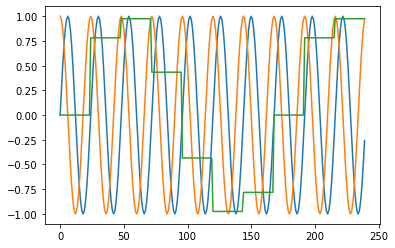

In [139]:
plt.plot(train[0:240, 1:4])

In [140]:
validation = pd.read_csv('validation_data.csv')

In [105]:
validation

,month,day,hour,day of week,air_temp_f,3039 power (kW),3538 power (kW),4031 power (kW),6139 power (kW),7951 power (kW),8386 power (kW),8565 power (kW),9278 power (kW)
0,8,1,0,2,81.45,4.43925,0.96875,1.10450,2.43700,0.88975,0.57325,1.93800,6.49000
1,8,1,1,2,79.90,4.38675,1.18525,0.88450,1.50425,0.91100,0.55875,1.59650,3.02125
2,8,1,2,2,78.38,4.36125,0.62125,1.01150,0.93800,1.42550,0.49500,1.56175,2.24950
3,8,1,3,2,76.44,2.49100,0.65175,0.62200,1.32025,0.85225,0.30275,1.48550,2.04150
4,8,1,4,2,75.81,2.61375,0.65550,0.76100,0.61875,0.36475,0.55925,1.48550,1.59750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,11,30,19,4,72.25,2.57850,0.78300,0.71800,1.12125,0.76275,1.22200,1.60975,0.57100
2925,11,30,20,4,71.10,2.95800,0.75000,1.99775,1.11650,0.86700,0.77025,1.17125,0.57725
2926,11,30,21,4,70.06,1.09100,0.45775,1.98400,1.07475,0.98475,0.62075,1.16150,0.61450
2927,11,30,22,4,69.57,4.41925,0.41075,0.81625,0.85150,0.88025,0.73175,1.08150,0.42350


In [106]:
for i in range(5, 13):
    if i == 5:
        power_val = validation.iloc[:, i]
    else:
        power_val = power_val + validation.iloc[:, i]
power_val

0       18.84050
1       14.04825
2       12.66375
3        9.76700
4        8.65600
          ...   
2924     9.36625
2925    10.20800
2926     7.98900
2927     9.61475
2928     8.62225
Length: 2929, dtype: float64

In [107]:
validation = pd.concat([validation, power_val], axis=1)
validation.columns = ['month','day','hour','day of week','air_temp_f','3039 power (kW)','3538 power (kW)','4031 power (kW)','6139 power (kW)','7951 power (kW)','8386 power (kW)','8565 power (kW)','9278 power (kW)','power(kW)']

In [108]:
validation

,month,day,hour,day of week,air_temp_f,3039 power (kW),3538 power (kW),4031 power (kW),6139 power (kW),7951 power (kW),8386 power (kW),8565 power (kW),9278 power (kW),power(kW)
0,8,1,0,2,81.45,4.43925,0.96875,1.10450,2.43700,0.88975,0.57325,1.93800,6.49000,18.84050
1,8,1,1,2,79.90,4.38675,1.18525,0.88450,1.50425,0.91100,0.55875,1.59650,3.02125,14.04825
2,8,1,2,2,78.38,4.36125,0.62125,1.01150,0.93800,1.42550,0.49500,1.56175,2.24950,12.66375
3,8,1,3,2,76.44,2.49100,0.65175,0.62200,1.32025,0.85225,0.30275,1.48550,2.04150,9.76700
4,8,1,4,2,75.81,2.61375,0.65550,0.76100,0.61875,0.36475,0.55925,1.48550,1.59750,8.65600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,11,30,19,4,72.25,2.57850,0.78300,0.71800,1.12125,0.76275,1.22200,1.60975,0.57100,9.36625
2925,11,30,20,4,71.10,2.95800,0.75000,1.99775,1.11650,0.86700,0.77025,1.17125,0.57725,10.20800
2926,11,30,21,4,70.06,1.09100,0.45775,1.98400,1.07475,0.98475,0.62075,1.16150,0.61450,7.98900
2927,11,30,22,4,69.57,4.41925,0.41075,0.81625,0.85150,0.88025,0.73175,1.08150,0.42350,9.61475


In [110]:
validation.to_csv('validation_data.csv',index=False)